In [19]:
import pandas as pd

In [20]:
data = pd.read_csv('online_retail.csv')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


Уникальные значения товаров

In [21]:
data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: count, Length: 4223, dtype: int64

## Очистка данных
На данном этапе нужно очистить данные чтобы с ними было возможно работать. Проверим значение цены.
Все данные, которые не имеют или имеют отрицательную цену должны быть очищены

In [22]:
data.loc[data['UnitPrice'] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,15287,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,15287,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,15287,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,15287,United Kingdom
...,...,...,...,...,...,...,...,...
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,15287,United Kingdom
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2011-12-08 13:58:00,0.0,15287,United Kingdom
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2011-12-08 13:58:00,0.0,15287,United Kingdom
538554,581408,85175,NaN,20,2011-12-08 14:06:00,0.0,15287,United Kingdom


In [23]:
data = data[data['UnitPrice'] > 0]

In [24]:
data[data['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


Добавим колонку с куплей/продажей

In [25]:
data['Transaction'] = data['Quantity'].apply(lambda x: 'Sold' if x < 0 else 'Bought')
data['Transaction'].value_counts()

Transaction
Bought    530104
Sold        9288
Name: count, dtype: int64

## Топ 10 покупателей по числу проданных товаров

In [26]:
customer_totals = data.groupby('CustomerID')['Quantity'].sum()
sorted_totals = customer_totals.sort_values(ascending=False)
top_customers = sorted_totals.head(10)
top_customers

CustomerID
15287    418230
14646    196143
12415     76946
14911     76930
17450     69029
18102     64122
17511     63012
13694     61803
14298     58021
14156     57025
Name: Quantity, dtype: int64

In [27]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
data['Time'] = data['InvoiceDate'].dt.strftime('%H:%M:%S')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Bought,2011-12-09,12:50:00
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Bought,2011-12-09,12:50:00
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00


In [28]:
# Create new column with time interval labels
time = data['InvoiceDate'].dt.hour
data['Time of Day'] = [
    'Early Morning' if x < 6 else
    'Morning' if x < 12 else
    'Noon' if x < 14 else
    'Afternoon' if x < 18 else
    'Evening' if x < 22 else 'Night' for x in time]
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction,Date,Time,Time of Day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,Bought,2010-12-01,08:26:00,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,Bought,2011-12-09,12:50:00,Noon
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,Bought,2011-12-09,12:50:00,Noon
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00,Noon
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,Bought,2011-12-09,12:50:00,Noon


<Axes: xlabel='Time of Day', ylabel='count'>

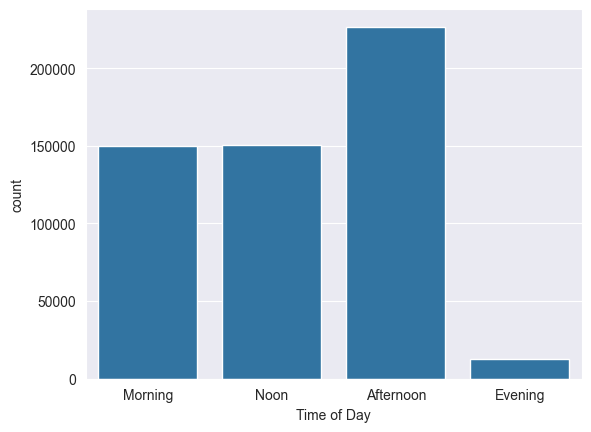

In [29]:
import seaborn as sns
sns.countplot(data, x='Time of Day')

# Assosiations (Market bucket analysis)

In [30]:
import pandas as pd

In [32]:
df = pd.read_csv('groceries_dataset.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [34]:
df['transaction'] = df['Member_number'].astype(str) + '_' + df['Date'].astype(str)
df

,Member_number,Date,itemDescription,transaction
0,1808,21-07-2015,tropical fruit,1808_21-07-2015
1,2552,05-01-2015,whole milk,2552_05-01-2015
2,2300,19-09-2015,pip fruit,2300_19-09-2015
3,1187,12-12-2015,other vegetables,1187_12-12-2015
4,3037,01-02-2015,whole milk,3037_01-02-2015
...,...,...,...,...
38760,4471,08-10-2014,sliced cheese,4471_08-10-2014
38761,2022,23-02-2014,candy,2022_23-02-2014
38762,1097,16-04-2014,cake bar,1097_16-04-2014
38763,1510,03-12-2014,fruit/vegetable juice,1510_03-12-2014


In [35]:
df2 = pd.crosstab(df['transaction'], df['itemDescription'])
df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_24-06-2014,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_24-07-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_25-11-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_27-05-2015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
def encode(item_freq):
    res = False
    if item_freq > 0:
        res = True
    return res

basket_input = df2.applymap(encode)
basket_input

C:\Users\stasp\AppData\Local\Temp\ipykernel_31624\722219245.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_input = df2.applymap(encode)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
transaction,,,,,,,,,,,,,,,,,,,,,
1000_15-03-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1000_24-06-2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1000_24-07-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000_25-11-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1000_27-05-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999_24-01-2015,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4999_26-12-2015,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5000_09-03-2014,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Apriori

In [37]:
from mlxtend.frequent_patterns import apriori, fpgrowth
from mlxtend.frequent_patterns import association_rules

apriori_items = apriori(basket_input, min_support=0.004, use_colnames=True)
apriori_rules = association_rules(apriori_items, metric="lift")

In [38]:
apriori_rules.sort_values(["support", "confidence", "lift"], ascending=False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
56,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550,-0.214986
57,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350,-0.224474
74,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861,-0.190525
75,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638,-0.203508
41,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219,-0.198448
40,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729,-0.202951
62,(sausage),(whole milk),0.060349,0.157923,0.008955,0.148394,0.939663,-0.000575,0.988811,-0.063965
63,(whole milk),(sausage),0.157923,0.060349,0.008955,0.056708,0.939663,-0.000575,0.996140,-0.070851


## FPGrowth

In [39]:
fpgrowth_items: pd.DataFrame = fpgrowth(basket_input, min_support=0.001, use_colnames=True, max_len=5, verbose=True)
fpgrowth_items = fpgrowth_items[fpgrowth_items.itemsets.map(len) > 2]

149 itemset(s) from tree conditioned on items ()
0 itemset(s) from tree conditioned on items (whole milk)
4 itemset(s) from tree conditioned on items (yogurt)
0 itemset(s) from tree conditioned on items (yogurt, whole milk)
0 itemset(s) from tree conditioned on items (yogurt, soda)
1 itemset(s) from tree conditioned on items (yogurt, other vegetables)
1 itemset(s) from tree conditioned on items (yogurt, rolls/buns)
8 itemset(s) from tree conditioned on items (sausage)
0 itemset(s) from tree conditioned on items (sausage, whole milk)
1 itemset(s) from tree conditioned on items (sausage, yogurt)
1 itemset(s) from tree conditioned on items (sausage, rolls/buns)
0 itemset(s) from tree conditioned on items (sausage, bottled water)
0 itemset(s) from tree conditioned on items (sausage, root vegetables)
0 itemset(s) from tree conditioned on items (sausage, tropical fruit)
1 itemset(s) from tree conditioned on items (sausage, soda)
0 itemset(s) from tree conditioned on items (sausage, other veg

In [40]:
fpgrowth_items.sort_values("support", ascending=False).head(8)

,support,itemsets
163,0.001470,"(sausage, yogurt, whole milk)"
154,0.001337,"(yogurt, rolls/buns, whole milk)"
257,0.001203,"(other vegetables, rolls/buns, whole milk)"
153,0.001136,"(other vegetables, yogurt, whole milk)"
164,0.001136,"(sausage, rolls/buns, whole milk)"
214,0.001136,"(other vegetables, soda, whole milk)"
216,0.001136,"(other vegetables, soda, rolls/buns)"
165,0.001069,"(sausage, soda, whole milk)"
